In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boston = pd.read_csv("C:/Users/harik/python pratice/00 - datasets-20251216T065029Z-1-001/00 - datasets/boston.csv")
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
X = boston.drop('House Price', axis=1)
y = boston['House Price']

In [4]:
X.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03


In [5]:
y.head(3)

0    24.0
1    21.6
2    34.7
Name: House Price, dtype: float64

In [6]:
from sklearn.linear_model import Lasso, Ridge,ElasticNet, LinearRegression

### Linear Regression

In [7]:
lreg = LinearRegression()
lreg.fit(X,y)

LinearRegression()

In [8]:
lreg.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [9]:
model_params = pd.DataFrame(lreg.coef_, index=X.columns, columns=['LinearRegression'])
model_params

,LinearRegression
CRIM,-0.108011
ZN,0.046420
INDUS,0.020559
CHAS,2.686734
NOX,-17.766611
RM,3.809865
AGE,0.000692
DIS,-1.475567
RAD,0.306049
TAX,-0.012335


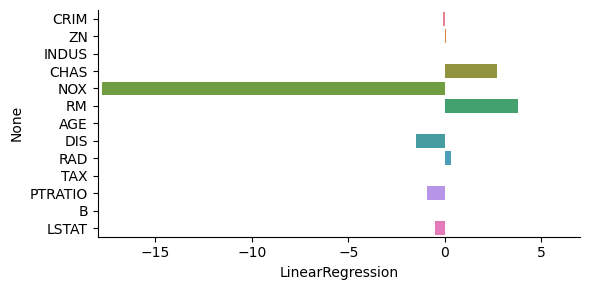

In [10]:
sns.catplot(model_params, x='LinearRegression',y=model_params.index,
            kind='bar',
            hue=model_params.index,
            height=3,
            aspect=2
           )
plt.xlim(-18,7)
plt.show()

### Lasso

In [11]:
lasso = Lasso(alpha=0.1)
lasso.fit(X,y)

Lasso(alpha=0.1)

In [12]:
model_params['Lasso'] = lasso.coef_
model_params

,LinearRegression,Lasso
CRIM,-0.108011,-0.097894
ZN,0.046420,0.049211
INDUS,0.020559,-0.036619
CHAS,2.686734,0.955190
NOX,-17.766611,-0.000000
RM,3.809865,3.703202
AGE,0.000692,-0.010037
DIS,-1.475567,-1.160538
RAD,0.306049,0.274707
TAX,-0.012335,-0.014570


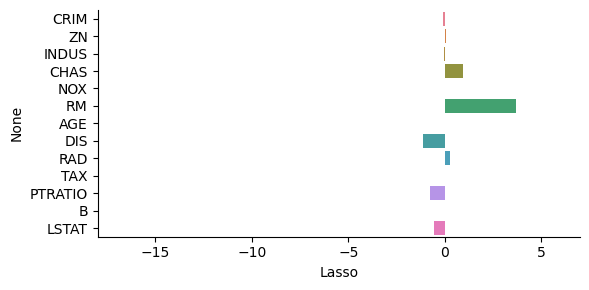

In [13]:
sns.catplot(model_params, x='Lasso',y=model_params.index,
            kind='bar',
            hue=model_params.index,
            height=3,
            aspect=2
           )
plt.xlim(-18,7)
plt.show()

### Ridge

In [14]:
ridge = Ridge(alpha=1.0)
ridge.fit(X,y)

Ridge()

In [15]:
model_params['Ridge'] = ridge.coef_
model_params

,LinearRegression,Lasso,Ridge
CRIM,-0.108011,-0.097894,-0.104595
ZN,0.046420,0.049211,0.047443
INDUS,0.020559,-0.036619,-0.008805
CHAS,2.686734,0.955190,2.552393
NOX,-17.766611,-0.000000,-10.777015
RM,3.809865,3.703202,3.854000
AGE,0.000692,-0.010037,-0.005415
DIS,-1.475567,-1.160538,-1.372654
RAD,0.306049,0.274707,0.290142
TAX,-0.012335,-0.014570,-0.012912


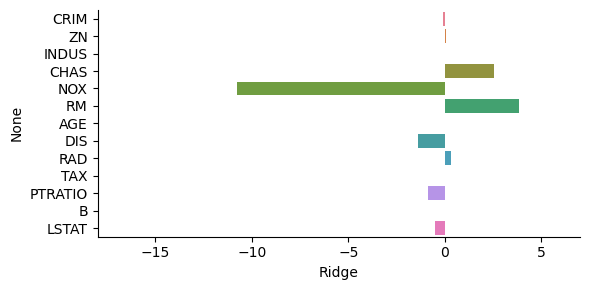

In [16]:
sns.catplot(model_params, x='Ridge',y=model_params.index,
            kind='bar',
            hue=model_params.index,
            height=3,
            aspect=2
           )
plt.xlim(-18,7)
plt.show()

#### ElasticNet

In [17]:
elastic = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic.fit(X,y)

ElasticNet()

In [18]:
model_params['Elastic'] = elastic.coef_
model_params

,LinearRegression,Lasso,Ridge,Elastic
CRIM,-0.108011,-0.097894,-0.104595,-0.080371
ZN,0.046420,0.049211,0.047443,0.053240
INDUS,0.020559,-0.036619,-0.008805,-0.012657
CHAS,2.686734,0.955190,2.552393,0.000000
NOX,-17.766611,-0.000000,-10.777015,-0.000000
RM,3.809865,3.703202,3.854000,0.933936
AGE,0.000692,-0.010037,-0.005415,0.020579
DIS,-1.475567,-1.160538,-1.372654,-0.762044
RAD,0.306049,0.274707,0.290142,0.301569
TAX,-0.012335,-0.014570,-0.012912,-0.016439


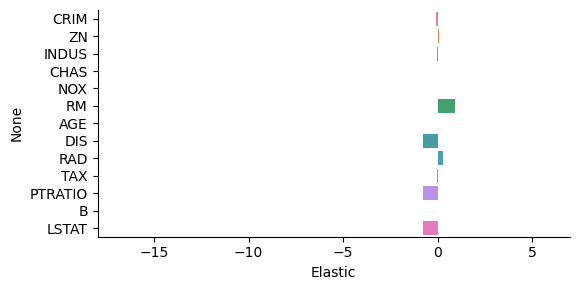

In [19]:
sns.catplot(model_params, x='Elastic',y=model_params.index,
            kind='bar',
            hue=model_params.index,
            height=3,
            aspect=2
           )
plt.xlim(-18,7)
plt.show()